## 1. Сгенерировать пакетом hopfield-tracking датасет spdsim с параметрами по умолчанию

In [1]:
import vispy
# selecting sub-backend behind jupyter_rfb:
# 1) pyglfw has high priority if present
# 2) to use any other backend, install then designate as default
# 4) use jupyter_rfb, it then selects the sub-backend according to config
# 5) enable jupyterlab extensions for interactive widget provided by jupyter_rfb

# only needed in jhub2, jhub and jlab-hpc can't run opengl at all, locally auto-selected backend is OK
vispy.config.update(default_backend='egl')
vispy.use('jupyter_rfb')

RFBOutputContext()

RFBOutputContext()

CanvasBackend(css_height='768px', css_width='1024px')
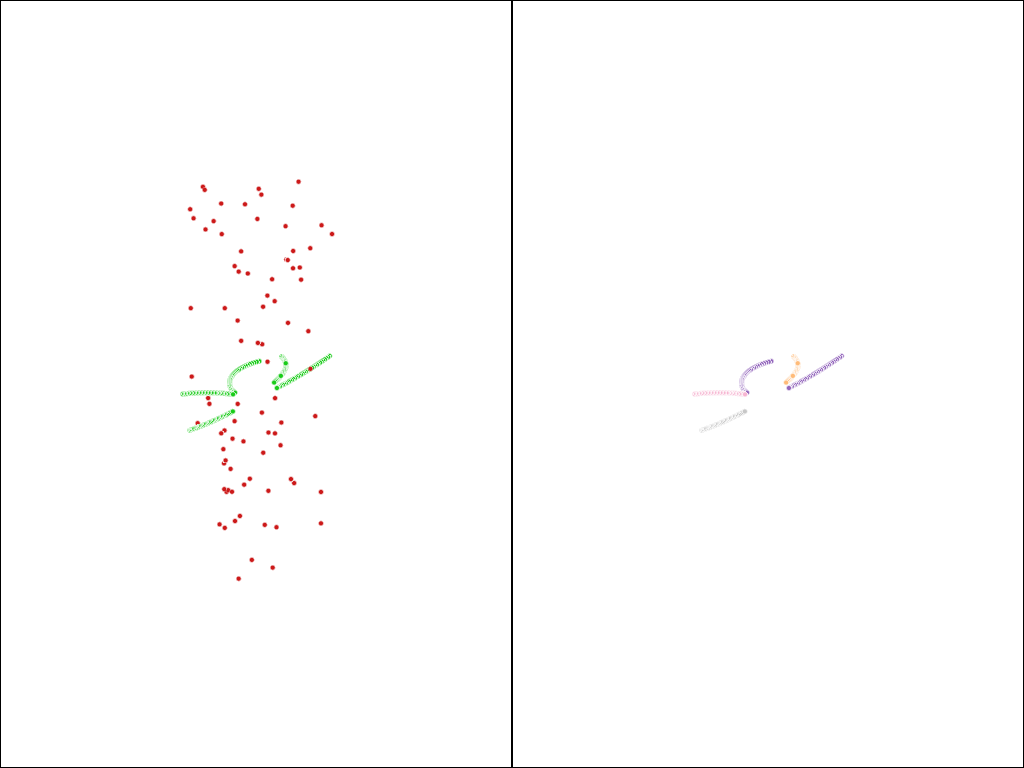

In [2]:
from segment.candidate import gen_seg_layered
from segment.track import gen_seg_track_layered, gen_seg_track_sequential
from tracking.plot import plot_event, plot_seg_diff
from vispy.scene import SceneCanvas
from datasets import get_hits

canvas = SceneCanvas(bgcolor='white', size=(1000, 1500))
grid = canvas.central_widget.add_grid()

event = get_hits('spdsim', 1)
plot_event(event)

In [3]:
event

,x,y,z,layer,track,event_id
0,-245.523215,-112.251510,-377.493013,1,0,0
1,-261.878912,-117.635714,-389.728502,2,0,0
2,-278.178353,-122.877299,-402.150850,3,0,0
3,-294.562717,-127.910250,-414.221356,4,0,0
4,-311.155726,-132.680374,-426.676547,5,0,0
...,...,...,...,...,...,...
254,378.547738,313.881641,-1467.502078,13,-1,0
255,-674.706208,-232.440439,-612.988511,26,-1,0
256,372.153902,13.011954,1640.441741,6,-1,0
257,749.481078,322.445587,-1472.838251,32,-1,0


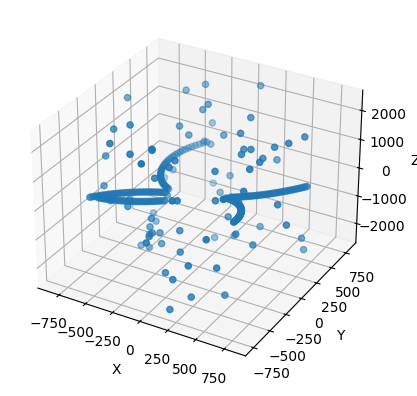

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_event(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = df['x']
    y = df['y']
    z = df['z']

    ax.scatter(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

draw_event(event)

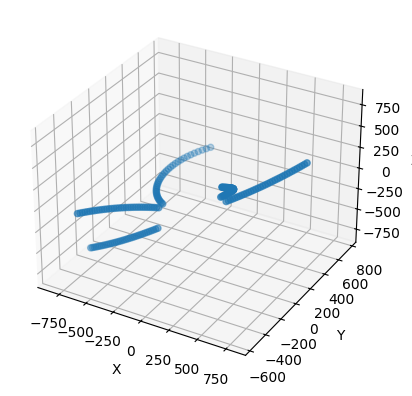

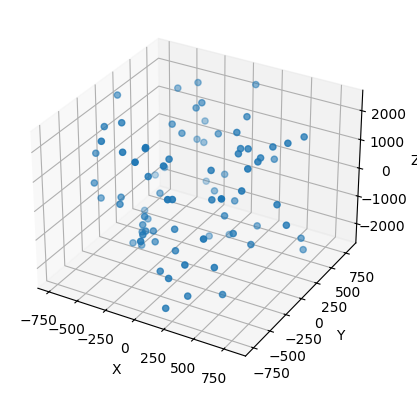

In [5]:
df_track = event.loc[event['track'] >= 0]
df_noise = event.loc[event['track'] == -1]

draw_event(df_track)
draw_event(df_noise)

## 2. Добавить цилиндрические координаты хитов вокруг оси z

In [6]:
from tracking.hit import add_cylindric_coordinates

add_cylindric_coordinates(event)

,x,y,z,layer,track,event_id,r,phi
0,-245.523215,-112.251510,-377.493013,1,0,0,269.966758,-2.712773
1,-261.878912,-117.635714,-389.728502,2,0,0,287.086617,-2.719405
2,-278.178353,-122.877299,-402.150850,3,0,0,304.108577,-2.725645
3,-294.562717,-127.910250,-414.221356,4,0,0,321.135837,-2.731924
4,-311.155726,-132.680374,-426.676547,5,0,0,338.263163,-2.738527
...,...,...,...,...,...,...,...,...
254,378.547738,313.881641,-1467.502078,13,-1,0,491.752046,0.692278
255,-674.706208,-232.440439,-612.988511,26,-1,0,713.622467,-2.809820
256,372.153902,13.011954,1640.441741,6,-1,0,372.381307,0.034950
257,749.481078,322.445587,-1472.838251,32,-1,0,815.900143,0.406288


## 3. Реализовать с помощью любого метода машинного обучения классификацию хитов на настоящие и шумовые. Визуализировать результат для одного тестового события. Посчитать f1_score классификации на тестовом датасете spdsim с параметрами по умолчанию.

In [7]:
import numpy as np
y_train = event['track'].to_numpy() 
y_train = np.where(y_train >= 0, 1, 0)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
df_train = event.drop(['track', 'event_id'], axis=1)
df_train

,x,y,z,layer,r,phi
0,-245.523215,-112.251510,-377.493013,1,269.966758,-2.712773
1,-261.878912,-117.635714,-389.728502,2,287.086617,-2.719405
2,-278.178353,-122.877299,-402.150850,3,304.108577,-2.725645
3,-294.562717,-127.910250,-414.221356,4,321.135837,-2.731924
4,-311.155726,-132.680374,-426.676547,5,338.263163,-2.738527
...,...,...,...,...,...,...
254,378.547738,313.881641,-1467.502078,13,491.752046,0.692278
255,-674.706208,-232.440439,-612.988511,26,713.622467,-2.809820
256,372.153902,13.011954,1640.441741,6,372.381307,0.034950
257,749.481078,322.445587,-1472.838251,32,815.900143,0.406288


In [9]:
x_train = df_train.to_numpy()
x_train

array([[-2.45523215e+02, -1.12251510e+02, -3.77493013e+02,
         1.00000000e+00,  2.69966758e+02, -2.71277310e+00],
       [-2.61878912e+02, -1.17635714e+02, -3.89728502e+02,
         2.00000000e+00,  2.87086617e+02, -2.71940514e+00],
       [-2.78178353e+02, -1.22877299e+02, -4.02150850e+02,
         3.00000000e+00,  3.04108577e+02, -2.72564460e+00],
       ...,
       [ 3.72153902e+02,  1.30119535e+01,  1.64044174e+03,
         6.00000000e+00,  3.72381307e+02,  3.49496675e-02],
       [ 7.49481078e+02,  3.22445587e+02, -1.47283825e+03,
         3.20000000e+01,  8.15900143e+02,  4.06288034e-01],
       [ 5.31592749e+02, -2.24636603e+02,  1.03367281e+03,
         1.80000000e+01,  5.77106970e+02, -3.99812939e-01]])

### Генерация тестового датасета

RFBOutputContext()

RFBOutputContext()

CanvasBackend(css_height='768px', css_width='1024px')
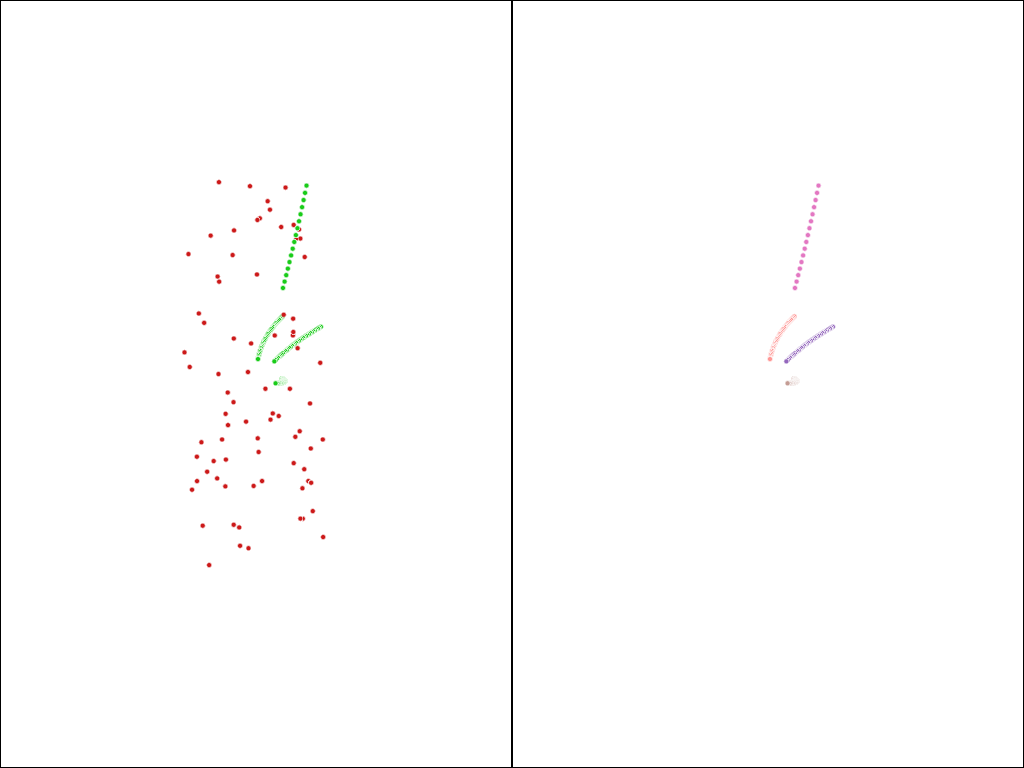

In [10]:
from segment.candidate import gen_seg_layered
from segment.track import gen_seg_track_layered, gen_seg_track_sequential
from tracking.plot import plot_event, plot_seg_diff
from vispy.scene import SceneCanvas
from tracking.hit import add_cylindric_coordinates
from datasets import get_hits

canvas = SceneCanvas(bgcolor='white', size=(1000, 1500))
grid = canvas.central_widget.add_grid()

event_test = get_hits('spdsim', 1)
add_cylindric_coordinates(event_test)
plot_event(event_test)

In [11]:
event_test

,x,y,z,layer,track,event_id,r,phi
0,68.398786,261.174598,292.978949,1,0,0,269.982527,1.314660
1,74.721852,277.067049,302.421156,2,0,0,286.966034,1.307375
2,81.219403,293.091926,311.543085,3,0,0,304.137252,1.300467
3,88.026924,308.751475,320.811173,4,0,0,321.054844,1.293059
4,94.963536,324.681363,329.873639,5,0,0,338.283994,1.286251
...,...,...,...,...,...,...,...,...
195,351.350553,123.469605,2028.998756,6,-1,0,372.413687,0.337934
196,437.901343,-48.668420,194.043392,10,-1,0,440.597551,-0.110686
197,630.094252,253.861695,-1633.152189,24,-1,0,679.311804,0.382999
198,-488.605337,-496.322655,-1786.370373,25,-1,0,696.470641,-2.348359


In [12]:
y_test_right  = event_test['track'].to_numpy()
y_test_right = np.where(y_test_right >= 0, 1, 0)
y_test_right 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:
df_test = event_test.drop(['track', 'event_id'], axis=1)
df_test

,x,y,z,layer,r,phi
0,68.398786,261.174598,292.978949,1,269.982527,1.314660
1,74.721852,277.067049,302.421156,2,286.966034,1.307375
2,81.219403,293.091926,311.543085,3,304.137252,1.300467
3,88.026924,308.751475,320.811173,4,321.054844,1.293059
4,94.963536,324.681363,329.873639,5,338.283994,1.286251
...,...,...,...,...,...,...
195,351.350553,123.469605,2028.998756,6,372.413687,0.337934
196,437.901343,-48.668420,194.043392,10,440.597551,-0.110686
197,630.094252,253.861695,-1633.152189,24,679.311804,0.382999
198,-488.605337,-496.322655,-1786.370373,25,696.470641,-2.348359


In [14]:
x_test = df_test.to_numpy()
x_test

array([[ 6.83987864e+01,  2.61174598e+02,  2.92978949e+02,
         1.00000000e+00,  2.69982527e+02,  1.31465958e+00],
       [ 7.47218523e+01,  2.77067049e+02,  3.02421156e+02,
         2.00000000e+00,  2.86966034e+02,  1.30737466e+00],
       [ 8.12194032e+01,  2.93091926e+02,  3.11543085e+02,
         3.00000000e+00,  3.04137252e+02,  1.30046731e+00],
       ...,
       [ 6.30094252e+02,  2.53861695e+02, -1.63315219e+03,
         2.40000000e+01,  6.79311804e+02,  3.82999397e-01],
       [-4.88605337e+02, -4.96322655e+02, -1.78637037e+03,
         2.50000000e+01,  6.96470641e+02, -2.34835924e+00],
       [-2.99848074e+02,  5.04819814e+01, -2.11823931e+03,
         2.00000000e+00,  3.04067916e+02,  2.97479829e+00]])

### Классификация

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
y_test = clf.predict(x_test)

### Визуализация

In [22]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0])

In [23]:
import pandas as pd

cls = pd.DataFrame(y_test, columns=['cluster'])

df_test = pd.concat([df_test, cls], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,68.398786,261.174598,292.978949,1,269.982527,1.314660,1
1,74.721852,277.067049,302.421156,2,286.966034,1.307375,1
2,81.219403,293.091926,311.543085,3,304.137252,1.300467,1
3,88.026924,308.751475,320.811173,4,321.054844,1.293059,0
4,94.963536,324.681363,329.873639,5,338.283994,1.286251,0
...,...,...,...,...,...,...,...
195,351.350553,123.469605,2028.998756,6,372.413687,0.337934,0
196,437.901343,-48.668420,194.043392,10,440.597551,-0.110686,1
197,630.094252,253.861695,-1633.152189,24,679.311804,0.382999,0
198,-488.605337,-496.322655,-1786.370373,25,696.470641,-2.348359,0


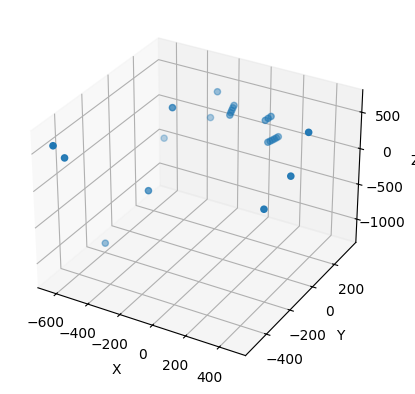

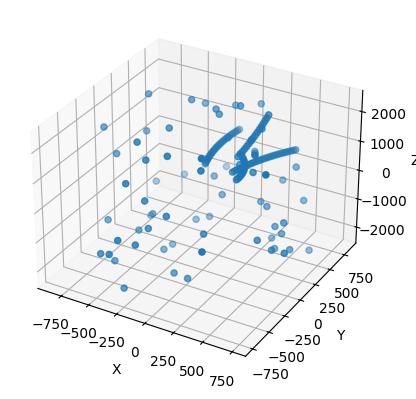

In [24]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)

### Подсчет f1_score

In [26]:
import numpy as np
from sklearn.metrics import f1_score

f1_score(y_test_right, y_test)

0.1917808219178082

### DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
first_tree

DecisionTreeClassifier(max_depth=2, random_state=13)

In [28]:
try:
  first_tree.fit(x_train, y_train)
except Exception as e:
  print(e)

In [29]:
from sklearn.tree import export_text

tree_rules = export_text(first_tree, feature_names=list(df_train.columns))
print(tree_rules)

|--- z <= 824.90
|   |--- z <= -799.42
|   |   |--- class: 0
|   |--- z >  -799.42
|   |   |--- class: 1
|--- z >  824.90
|   |--- class: 0



In [30]:
prediction = first_tree.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

### Визуализация

In [31]:
y_test_right

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [32]:
df_test.drop(['cluster'], axis=1, inplace=True)

In [33]:
cluster = pd.DataFrame(prediction, columns=['cluster'])
df_test = pd.concat([df_test, cluster], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,68.398786,261.174598,292.978949,1,269.982527,1.314660,1
1,74.721852,277.067049,302.421156,2,286.966034,1.307375,1
2,81.219403,293.091926,311.543085,3,304.137252,1.300467,1
3,88.026924,308.751475,320.811173,4,321.054844,1.293059,1
4,94.963536,324.681363,329.873639,5,338.283994,1.286251,1
...,...,...,...,...,...,...,...
195,351.350553,123.469605,2028.998756,6,372.413687,0.337934,0
196,437.901343,-48.668420,194.043392,10,440.597551,-0.110686,1
197,630.094252,253.861695,-1633.152189,24,679.311804,0.382999,0
198,-488.605337,-496.322655,-1786.370373,25,696.470641,-2.348359,0


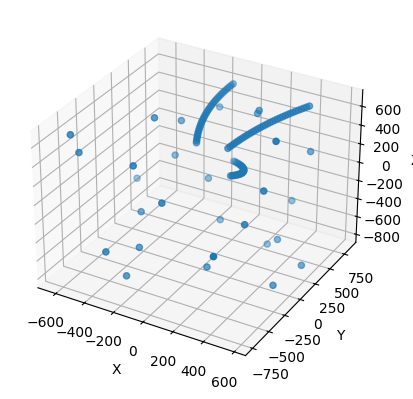

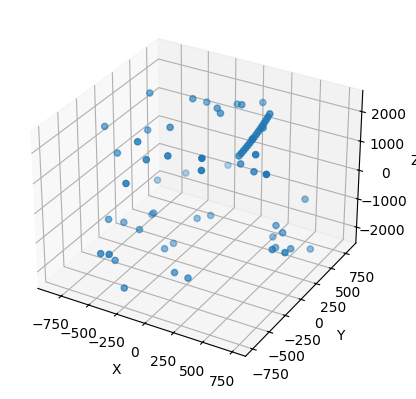

In [34]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)

### Подсчет f1_score

In [35]:
from sklearn.metrics import f1_score

f1_score(y_test_right, prediction)


0.8267716535433072